In [8]:
#!/usr/bin/env python
"""
Description
"""
import os
from collections import OrderedDict

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from RepresentativeWeeks import *
from misc.RepresentativePeriods import SolarPanelSingleNode

%matplotlib inline

############################################
## PARAMETERS
############################################

In [25]:
num = 5
A = 60000
V = 60e3
P = 4.1e6
print 'A:', str(A)
print 'V:', str(V)
print 'P:', str(P)

A: 60000
V: 60000.0
P: 4100000.0


In [26]:
corr = 'nocorr'
##
############################################

with_corr = {
    4: OrderedDict([(45, 14.0), (118, 12.0), (163, 16.0), (309, 10.0)]),
    5: OrderedDict(
        [(45, 14.0), (118, 12.0), (173, 7.0), (195, 9.0), (309, 10.0)]),
    6: OrderedDict([(45, 14.0), (116, 12.0), (162, 12.0), (225, 3.0), (278,
                                                                       6.0),
                    (307, 5.0)]),
    7: OrderedDict([(34, 6.0), (45, 8.0), (92, 12.0), (166, 8.0), (263, 8.0),
                    (270, 3.0), (318, 7.0)]),
    8: OrderedDict(
        [(34, 6.0), (45, 8.0), (109, 5.0), (132, 7.0), (164, 8.0), (189, 7.0),
         (279, 5.0), (316, 6.0)])
}

corr_no_seasons = {

}
no_corr = {6: OrderedDict(
    [(49, 13.0), (132, 11.0), (164, 11.0), (190, 6.0), (301, 2.0), (339, 9.0)]),
    4: OrderedDict([(45, 14.0), (118, 12.0), (243, 15.0), (309, 11.0)]),
    8: OrderedDict(
        [(10, 2.0), (48, 12.0), (74, 2.0), (100, 10.0), (180, 5.0),
         (188, 7.0), (224, 5.0), (326, 9.0)]),
    7: OrderedDict(
        [(19, 3.0), (34, 6.0), (43, 4.0), (99, 12.0), (166, 9.0),
         (265, 8.0), (316, 10.0)]),
    5: OrderedDict(
        [(2, 7.0), (108, 11.0), (163, 17.0), (275, 11.0), (352, 6.0)])
}

df = pd.DataFrame(columns=['A', 'V', 'P', 'E_repr', 'E_full'])
if corr == 'nocorr':
    selection = no_corr[num]
elif corr == 'corr':
    selection = with_corr[num]
elif corr == 'corrnoseasons':
    selection = corr_no_seasons[num]

In [27]:
duration_repr = 3

selection = OrderedDict([(31, 10.0), (45, 7.0), (112, 11.0), (153, 14.0), (170, 7.0), (191, 4.0), (210, 14.0), (270, 21.0), (299, 8.0), (337, 9.0), (359, 5.0), (363, 11.0)])

#with_corr[6]

# selection = OrderedDict(
#         [(1, 6.0), (37, 2.0), (71, 9.0), (98, 11.0), (218, 6.0), (228, 6.0), (256, 3.0), (295, 5.0), (354, 4.0)])

In [28]:
# Solve representative weeks
repr_model, optimizers = representative(
    duration_repr=duration_repr,
    selection=selection, solArea=A, storVol=V,
    backupPow=P)
energy_sol_repr = None
energy_backup_repr = None
energy_stor_loss_repr = None
energy_curt_repr = None

energy_sol_full = None
energy_curt_full = None
energy_stor_loss_full = None
energy_backup_full = None

status = solve_repr(repr_model)
print 'Representative weeks solved with status', str(status)

if status==0:
    energy_backup_repr = get_backup_energy(
        repr_model)
    energy_stor_loss_repr = get_stor_loss(
        optimizers, selection)
    energy_curt_repr = get_curt_energy(
        optimizers, selection)
    energy_sol_repr = get_sol_energy(
        optimizers, selection)
    if not os.path.isdir(os.path.join('comparison', corr)):
        os.mkdir(os.path.join('comparison', corr))
        # fig1.savefig(os.path.join('comparison', corr, '{}w_{}A_{}V_{}P_repr.png'.format(num, A, V, P)), dpi=300)

01-25 10:12 modesto.parameter.Parameter          INFO     Initializing Parameter Te
01-25 10:12 modesto.parameter.Parameter          INFO     Initializing Parameter Tg
01-25 10:12 modesto.Node                         INFO     Initializing Node Node
01-25 10:12 modesto.component.Component          INFO     Initializing Component storage
01-25 10:12 modesto.parameter.Parameter          INFO     Initializing Parameter Thi
01-25 10:12 modesto.parameter.Parameter          INFO     Initializing Parameter Tlo
01-25 10:12 modesto.parameter.Parameter          INFO     Initializing Parameter mflo_max
01-25 10:12 modesto.parameter.Parameter          INFO     Initializing Parameter volume
01-25 10:12 modesto.parameter.Parameter          INFO     Initializing Parameter ar
01-25 10:12 modesto.parameter.Parameter          INFO     Initializing Parameter dIns
01-25 10:12 modesto.parameter.Parameter          INFO     Initializing Parameter kIns
01-25 10:12 modesto.parameter.Parameter          INFO     

zeta H is: 0.999992650795


01-25 10:12 modesto.component.Component          INFO     Optimization model StorageCondensed storage compiled
01-25 10:12 modesto.components.SolThermCol       INFO     Optimization block for Component solar initialized
01-25 10:12 modesto.component.Component          INFO     Optimization block for Component demand initialized
01-25 10:12 modesto.component.Component          INFO     Optimization model <class 'modesto.component.BuildingFixed'> demand compiled
01-25 10:12 modesto.Node                         INFO     Compilation of Node finished
01-25 10:12 modesto.parameter.Parameter          INFO     Initializing Parameter Te
01-25 10:12 modesto.parameter.Parameter          INFO     Initializing Parameter Tg
01-25 10:12 modesto.Node                         INFO     Initializing Node Node
01-25 10:12 modesto.component.Component          INFO     Initializing Component storage
01-25 10:12 modesto.parameter.Parameter          INFO     Initializing Parameter Thi
01-25 10:12 modesto.param

zeta H is: 0.999992650795


01-25 10:12 modesto.component.Component          INFO     Optimization block for Component storage initialized
01-25 10:12 modesto.component.Component          INFO     Optimization model StorageCondensed storage compiled
01-25 10:12 modesto.components.SolThermCol       INFO     Optimization block for Component solar initialized
01-25 10:12 modesto.component.Component          INFO     Optimization block for Component demand initialized
01-25 10:12 modesto.component.Component          INFO     Optimization model <class 'modesto.component.BuildingFixed'> demand compiled
01-25 10:12 modesto.Node                         INFO     Compilation of Node finished
01-25 10:12 modesto.parameter.Parameter          INFO     Initializing Parameter Te
01-25 10:12 modesto.parameter.Parameter          INFO     Initializing Parameter Tg
01-25 10:12 modesto.Node                         INFO     Initializing Node Node
01-25 10:12 modesto.component.Component          INFO     Initializing Component storage

zeta H is: 0.999992650795


01-25 10:12 modesto.components.VarProducer       INFO     Optimization block for Component backup initialized
01-25 10:12 modesto.component.Component          INFO     Optimization block for Component storage initialized
01-25 10:12 modesto.component.Component          INFO     Optimization model StorageCondensed storage compiled
01-25 10:12 modesto.components.SolThermCol       INFO     Optimization block for Component solar initialized
01-25 10:12 modesto.component.Component          INFO     Optimization block for Component demand initialized
01-25 10:12 modesto.component.Component          INFO     Optimization model <class 'modesto.component.BuildingFixed'> demand compiled
01-25 10:12 modesto.Node                         INFO     Compilation of Node finished
01-25 10:12 modesto.parameter.Parameter          INFO     Initializing Parameter Te
01-25 10:12 modesto.parameter.Parameter          INFO     Initializing Parameter Tg
01-25 10:12 modesto.Node                         INFO     I

zeta H is: 0.999992650795


01-25 10:12 modesto.Node                         INFO     Optimization block initialized for Node
01-25 10:12 modesto.components.VarProducer       INFO     Optimization block for Component backup initialized
01-25 10:12 modesto.component.Component          INFO     Optimization block for Component storage initialized
01-25 10:12 modesto.component.Component          INFO     Optimization model StorageCondensed storage compiled
01-25 10:12 modesto.components.SolThermCol       INFO     Optimization block for Component solar initialized
01-25 10:12 modesto.component.Component          INFO     Optimization block for Component demand initialized
01-25 10:12 modesto.component.Component          INFO     Optimization model <class 'modesto.component.BuildingFixed'> demand compiled
01-25 10:12 modesto.Node                         INFO     Compilation of Node finished
01-25 10:12 modesto.parameter.Parameter          INFO     Initializing Parameter Te
01-25 10:12 modesto.parameter.Parameter      

zeta H is: 0.999992650795


01-25 10:12 modesto.component.Component          INFO     Optimization block for Component storage initialized
01-25 10:12 modesto.component.Component          INFO     Optimization model StorageCondensed storage compiled
01-25 10:12 modesto.components.SolThermCol       INFO     Optimization block for Component solar initialized
01-25 10:12 modesto.component.Component          INFO     Optimization block for Component demand initialized
01-25 10:12 modesto.component.Component          INFO     Optimization model <class 'modesto.component.BuildingFixed'> demand compiled
01-25 10:12 modesto.Node                         INFO     Compilation of Node finished
01-25 10:12 modesto.parameter.Parameter          INFO     Initializing Parameter Te
01-25 10:12 modesto.parameter.Parameter          INFO     Initializing Parameter Tg
01-25 10:12 modesto.Node                         INFO     Initializing Node Node
01-25 10:12 modesto.component.Component          INFO     Initializing Component storage

zeta H is: 0.999992650795
zeta H is: 0.999992650795


01-25 10:12 modesto.component.Component          INFO     Optimization model StorageCondensed storage compiled
01-25 10:12 modesto.components.SolThermCol       INFO     Optimization block for Component solar initialized
01-25 10:12 modesto.component.Component          INFO     Optimization block for Component demand initialized
01-25 10:12 modesto.component.Component          INFO     Optimization model <class 'modesto.component.BuildingFixed'> demand compiled
01-25 10:12 modesto.Node                         INFO     Compilation of Node finished
01-25 10:12 modesto.parameter.Parameter          INFO     Initializing Parameter Te
01-25 10:12 modesto.parameter.Parameter          INFO     Initializing Parameter Tg
01-25 10:12 modesto.Node                         INFO     Initializing Node Node
01-25 10:12 modesto.component.Component          INFO     Initializing Component storage
01-25 10:12 modesto.parameter.Parameter          INFO     Initializing Parameter Thi
01-25 10:12 modesto.param

zeta H is: 0.999992650795


01-25 10:12 modesto.parameter.Parameter          INFO     Initializing Parameter area
01-25 10:12 modesto.parameter.Parameter          INFO     Initializing Parameter delta_T
01-25 10:12 modesto.parameter.Parameter          INFO     Initializing Parameter heat_profile
01-25 10:12 modesto.components.SolThermCol       INFO     Initializing SolarThermalCollector solar
01-25 10:12 modesto.Node                         INFO     Component solar added to Node
01-25 10:12 modesto.component.Component          INFO     Initializing Component demand
01-25 10:12 modesto.parameter.Parameter          INFO     Initializing Parameter delta_T
01-25 10:12 modesto.parameter.Parameter          INFO     Initializing Parameter mult
01-25 10:12 modesto.parameter.Parameter          INFO     Initializing Parameter heat_profile
01-25 10:12 modesto.Node                         INFO     Component demand added to Node
01-25 10:12 modesto.Node                         INFO     Build of Node finished
01-25 10:12 modes

zeta H is: 0.999992650795
zeta H is: 0.999992650795


01-25 10:12 modesto.component.Component          INFO     Optimization model StorageCondensed storage compiled
01-25 10:12 modesto.components.SolThermCol       INFO     Optimization block for Component solar initialized
01-25 10:12 modesto.component.Component          INFO     Optimization block for Component demand initialized
01-25 10:12 modesto.component.Component          INFO     Optimization model <class 'modesto.component.BuildingFixed'> demand compiled
01-25 10:12 modesto.Node                         INFO     Compilation of Node finished
01-25 10:12 modesto.parameter.Parameter          INFO     Initializing Parameter Te
01-25 10:12 modesto.parameter.Parameter          INFO     Initializing Parameter Tg
01-25 10:12 modesto.Node                         INFO     Initializing Node Node
01-25 10:12 modesto.component.Component          INFO     Initializing Component storage
01-25 10:12 modesto.parameter.Parameter          INFO     Initializing Parameter Thi
01-25 10:12 modesto.param

zeta H is: 0.999992650795
zeta H is: 0.999992650795


01-25 10:12 modesto.component.Component          INFO     Optimization model StorageCondensed storage compiled
01-25 10:12 modesto.components.SolThermCol       INFO     Optimization block for Component solar initialized
01-25 10:12 modesto.component.Component          INFO     Optimization block for Component demand initialized
01-25 10:12 modesto.component.Component          INFO     Optimization model <class 'modesto.component.BuildingFixed'> demand compiled
01-25 10:12 modesto.Node                         INFO     Compilation of Node finished


State equation added for storage Node.storage in representative week starting on day 363
State equation added for storage Node.storage in representative week starting on day 31
State equation added for storage Node.storage in representative week starting on day 45
State equation added for storage Node.storage in representative week starting on day 112
State equation added for storage Node.storage in representative week starting on day 153
State equation added for storage Node.storage in representative week starting on day 170
State equation added for storage Node.storage in representative week starting on day 191
State equation added for storage Node.storage in representative week starting on day 210
State equation added for storage Node.storage in representative week starting on day 270
State equation added for storage Node.storage in representative week starting on day 299
State equation added for storage Node.storage in representative week starting on day 337
State equation added fo

In [29]:
full_model = SolarPanelSingleNode.fullyear(storVol=V, solArea=A,
                                           backupPow=P)

status = SolarPanelSingleNode.solve_fullyear(full_model)
print 'Full optimization solved with status', str(status)

if status == 0:
    energy_backup_full = SolarPanelSingleNode.get_backup_energy(
        full_model)
    energy_stor_loss_full = SolarPanelSingleNode.get_stor_loss(
        full_model)
    energy_curt_full = SolarPanelSingleNode.get_curt_energy(
        full_model)
    energy_sol_full = \
        SolarPanelSingleNode.get_sol_energy(full_model)
    energy_full = SolarPanelSingleNode.get_backup_energy(full_model)
    #fig2 = SolarPanelSingleNode.plot_single_node(full_model)
    # fig2.savefig(os.path.join('comparison', corr, '{}w_{}A_{}V_{}P_full.png'.format(num, A, V, P)), dpi=300)

01-25 10:12 modesto.parameter.Parameter          INFO     Initializing Parameter Te
01-25 10:12 modesto.parameter.Parameter          INFO     Initializing Parameter Tg
01-25 10:12 modesto.Node                         INFO     Initializing Node Node
01-25 10:12 modesto.component.Component          INFO     Initializing Component storage
01-25 10:12 modesto.parameter.Parameter          INFO     Initializing Parameter Thi
01-25 10:12 modesto.parameter.Parameter          INFO     Initializing Parameter Tlo
01-25 10:12 modesto.parameter.Parameter          INFO     Initializing Parameter mflo_max
01-25 10:12 modesto.parameter.Parameter          INFO     Initializing Parameter volume
01-25 10:12 modesto.parameter.Parameter          INFO     Initializing Parameter ar
01-25 10:12 modesto.parameter.Parameter          INFO     Initializing Parameter dIns
01-25 10:12 modesto.parameter.Parameter          INFO     Initializing Parameter kIns
01-25 10:12 modesto.parameter.Parameter          INFO     

Writing time: 17.871999979
Academic license - for non-commercial use only
Changed value of parameter MIPGap to 0.1
   Prev: 0.0001  Min: 0.0  Max: 1e+100  Default: 0.0001
Optimize a model with 122643 rows, 96364 columns and 245283 nonzeros
Coefficient statistics:
  Matrix range     [6e-06, 2e+05]
  Objective range  [1e-03, 1e+00]
  Bounds range     [4e+06, 2e+12]
  RHS range        [5e-11, 1e+09]
         Consider reformulating model or setting NumericFocus parameter
         to avoid numerical issues.

Concurrent LP optimizer: dual simplex and barrier
Showing barrier log only...

Presolve removed 116209 rows and 80547 columns
Presolve time: 0.12s
Presolved: 6434 rows, 15817 columns, 22251 nonzeros

Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 6.434e+03
 Factor NZ  : 1.093e+05 (roughly 10 MBytes of memory)
 Factor Ops : 2.306e+06 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Pri

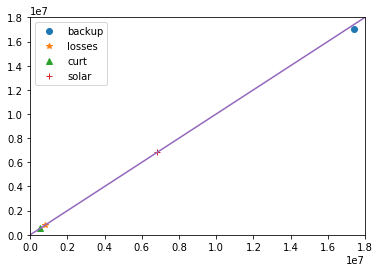

In [30]:
fig, ax = plt.subplots()

ax.plot(energy_backup_full, energy_backup_repr, 'o', label='backup')
ax.plot(energy_stor_loss_full, energy_stor_loss_repr, '*', label='losses')
ax.plot(energy_curt_full, energy_curt_repr, '^', label='curt')
ax.plot(energy_sol_full, energy_sol_repr, '+', label='solar')

x = np.linspace(*ax.get_xlim())
ax.plot(x, x)

ax.legend()

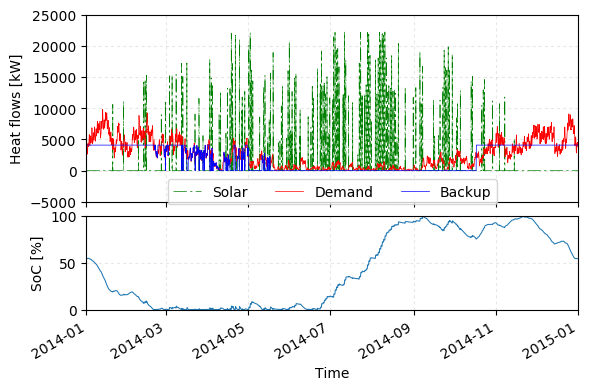

In [31]:
fig, axs = plt.subplots(2, 1, sharex=True,
                            gridspec_kw=dict(height_ratios=[2, 1]))

# axs[0].plot(optmodel.get_result('heat_flow', node='Node', comp='storage'), label='storage_HF')
axs[0].plot(full_model.get_result('heat_flow', node='Node', comp='solar')/1e3,
            'g', linestyle='-.', label='Solar', linewidth=0.5)
axs[0].plot(full_model.get_result('heat_flow', node='Node', comp='demand')/1e3,
            'r', label='Demand', linewidth=0.5)
axs[0].plot(full_model.get_result('heat_flow', node='Node', comp='backup')/1e3,
            'b', label='Backup', linewidth=0.5)
axs[0].legend(ncol=3, loc='lower center', bbox_to_anchor=(0.5,-0.05))

axs[0].set_ylabel('Heat flows [kW]')

#axs[0].set_title('Full year')

# axs[1].plot(optmodel.get_result('heat_stor', node='Node', comp='storage'), label='stor_E')
# axs[1].legend()

axs[1].plot(full_model.get_result('soc', node='Node', comp='storage'),
            label='SoC', linewidth=0.75)
#axs[1].legend()

axs[1].set_ylabel('SoC [%]')

axs[-1].set_xlabel('Time')

# axs[3].plot(optmodel.get_result('heat_flow_curt', node='Node', comp='solar'), label='Curt Heat')
# axs[3].legend()

for ax in axs:
    ax.grid(alpha=0.3, linestyle=':')

plt.gcf().autofmt_xdate()
fig.tight_layout()
fig.figsize = (8, 6)
fig.dpi = 100
fig.subplots_adjust(wspace=0.1, hspace=0.1)
fig.savefig('FullYear.png', dpi=400)

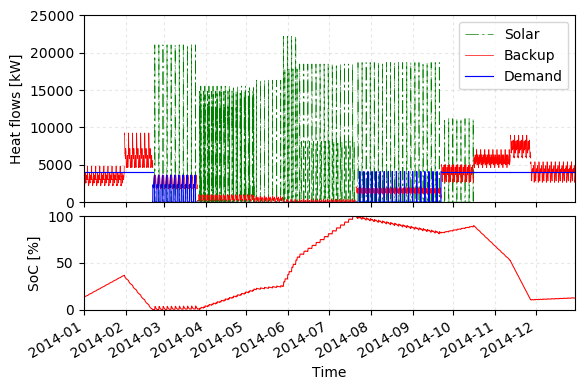

In [32]:
opt = optimizers

fig_out, axs = plt.subplots(2, 1, sharex=True, gridspec_kw=dict(height_ratios=[2, 1]))
start_d = pd.Timestamp('20140101')
next_d = start_d

prev_curt = 0

for startD, num_reps in selection.iteritems():
    # Heat flows
    axs[0].plot(
        construct_heat_flow(name='heat_flow', comp='solar', node='Node',
                            optimizer=opt[startD], reps=num_reps,
                            start_date=next_d)/1e3,
        color='g', linestyle = '-.', linewidth=0.5)
    axs[0].plot(
        construct_heat_flow(name='heat_flow', comp='demand', node='Node',
                            optimizer=opt[startD], reps=num_reps,
                            start_date=next_d)/1e3,
        color='r', linewidth=0.5)
    axs[0].plot(
        construct_heat_flow(name='heat_flow', comp='backup', node='Node',
                            optimizer=opt[startD], reps=num_reps,
                            start_date=next_d)/1e3,
        color='b', linewidth=0.85)

    # Storage state
    results = opt[startD].get_component(name='storage',
                                        node='Node').get_soc()
    date_ind = pd.DatetimeIndex(start=next_d, freq='1H',
                                periods=len(results))
    axs[1].plot(date_ind, results, color='r', label=str(startD), linewidth=0.75)

    next_d = next_d + pd.Timedelta(days=duration_repr * num_reps)

axs[0].legend(['Solar', 'Backup', 'Demand'])
#axs[0].set_title('Representative')

axs[0].set_ylabel('Heat flows [kW]')
axs[1].set_ylabel('SoC [%]')

axs[1].set_xlabel('Time')

for ax in axs:
    ax.grid(alpha=0.3, linestyle=':')
plt.gcf().autofmt_xdate()

fig_out.tight_layout()
fig_out.figsize=(8,6)
fig_out.dpi = 100
fig_out.subplots_adjust(wspace=0.1, hspace=0.1)

fig_out.savefig('ReprYear6w.png', dpi=400)

In [33]:
print energy_backup_full/1e6

17.3979493972


In [34]:
print energy_backup_repr/1e6

17.0520094426


In [35]:
print energy_curt_full

543760.747618


In [36]:
print energy_curt_repr

598639.445198


In [37]:
(energy_backup_full-energy_backup_repr)/energy_backup_full

0.01988394992683306